Grab imports needed

In [1]:
import pandas as pd
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier


In [2]:
csv_file_object = csv.reader(open('train.csv', 'rb')) 
header = csv_file_object.next() 
data=[] 

for row in csv_file_object:
    data.append(row)
data = np.array(data) 

Define functions (makes for easier automation later)

In [3]:
def getData(csv):
    #Opens the data into a pandas DF.
    df = pd.read_csv(csv, header=0)
    return df


def addGender(df):
    #Creates a Gender column and populates it with a 0/1 value for Male/Female.
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    return df
    

def addMedianAges(df):
    #Creates AgeFill Column and populates it with Age
    df['AgeFill'] = df['Age']
    
    #Replaces NaN age values with median age for class and gender
    median_ages = np.zeros((2,3))
    for i in range(0, 2):
        for j in range(0, 3):
            median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
    
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),'AgeFill'] = median_ages[i,j]
    
    #Records which rows were back filled
    df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
    
    return df
        

def addFamilySize(df):
    #Creates a new column that groups number of siblings and parents to indicate family size
    df['FamilySize'] = df['SibSp'] + df['Parch']
    return df


def addAgeByClass(df):
    #multiplies Age and Class together to create a score as these values are high indicators
    df['Age*Class'] = df.AgeFill * df.Pclass
    
    return df

def createCleanData(csv):
    #runs the CSV through the process
    df = getData(csv)
    df = addGender(df)
    df = addMedianAges(df)
    df = addFamilySize(df)
    df = addAgeByClass(df)
    
    return df
    
def dropNonIntegerValues(df):
    #drops any columns that can't be used.
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Fare','Age','PassengerId'], axis=1) 
    
    return df

Grab the training and test data from a CSV. Also runs the data through the above functions to create additional columns and clean up the NaN values. 

In [4]:
test = createCleanData("test.csv")
train = createCleanData("train.csv")

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,34.5,0,0,103.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0,0,1,141.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,62.0,0,0,124.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,27.0,0,0,81.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,22.0,0,2,66.0


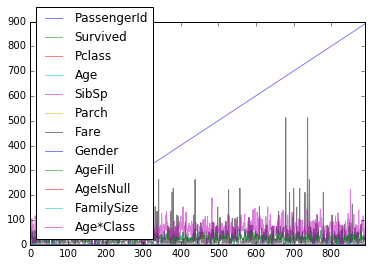

In [6]:
%matplotlib inline

train.plot(alpha=0.5)

Drops any unusable columns and returns the datafield as a Numpy Array.

In [7]:
test_data = dropNonIntegerValues(test)
train_data = dropNonIntegerValues(train)

Grabs the passenger ID's so they can be mapped in later. 

In [8]:
ids = test['PassengerId'].values

In [9]:
test_data.head(5)

,Pclass,SibSp,Parch,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,3,0,0,1,34.5,0,0,103.5
1,3,1,0,0,47.0,0,1,141.0
2,2,0,0,1,62.0,0,0,124.0
3,3,0,0,1,27.0,0,0,81.0
4,3,1,1,0,22.0,0,2,66.0


In [10]:
test_data = test_data.values
train_data = train_data.values

Trains the model

In [11]:
print 'Training...'
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data[0::,1::], train_data[0::,0] )
print 'Complete'

Training...
Complete


Runs the model over the test data set

In [12]:
print 'Predicting...'
output = forest.predict(test_data)
print 'Complete'

Predicting...
Complete


Outputs the predictions to a CSV file with just two columns. 

In [ ]:
predictions_file = open("myfirstforest.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

In [ ]:
output

In [ ]:
test = pd.DataFrame(output)

In [ ]:
test.head(5)
